In [2]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import numpy as np
import optax
import gym
import haiku as hk
import torch
import jax.random as jrandom
import matplotlib.pyplot as plt
from jax import value_and_grad

# from policy_network2 import initialize_weights, forward, loss
from training import fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
env = gym.make('CartPole-v1')
state_dim = env.observation_space.shape[0]
num_actions = env.action_space.n

actions = np.array([0, 1])

In [34]:
MAX_EPISODES = 1000
HORIZON = 500
GAMMA = 0.99
BATCH_SIZE = 32
SEED = jrandom.PRNGKey(2)

# model = torch.nn.Sequential(
#     torch.nn.Linear(state_dim, 256),
#     torch.nn.ReLU(),
#     torch.nn.Linear(256, num_actions),
#     torch.nn.Softmax(dim=0)
# )
# optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# params = initialize_weights([state_dim, 256, num_actions])
optimizer = optax.chain(
    optax.adam(learning_rate=0.002),
    # optax.scale(-1.0)
)

learned_params, scores, gradients = fit(
    env=env,
    # params=params,
    # params=[],
    # optimizer=optimizer,
    num_episodes=MAX_EPISODES,
    horizon=HORIZON,
    gamma=GAMMA,
    # model=model,
    batch_size=BATCH_SIZE,
)

Episode 0, Average Score: nan
Episode 50, Average Score: 28.65999984741211
Episode 100, Average Score: 38.20000076293945
Episode 150, Average Score: 45.10000228881836
Episode 200, Average Score: 48.16499710083008
Episode 250, Average Score: 52.21600341796875
Episode 300, Average Score: 56.900001525878906
Episode 350, Average Score: 66.18000030517578
Episode 400, Average Score: 82.1824951171875
Episode 450, Average Score: 100.22222137451172
Episode 500, Average Score: 125.60600280761719
Episode 550, Average Score: 142.2145538330078
Episode 600, Average Score: 155.42666625976562
Episode 650, Average Score: 170.82461547851562
Episode 700, Average Score: 179.89999389648438
Episode 750, Average Score: 191.70799255371094
Episode 800, Average Score: 202.72000122070312
Episode 850, Average Score: 212.3352813720703
Episode 900, Average Score: 223.81666564941406
Episode 950, Average Score: 231.8610382080078


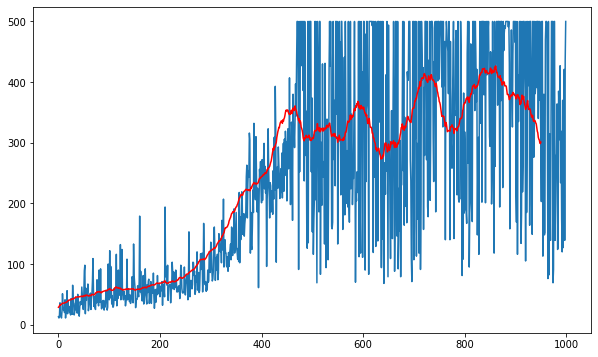

In [36]:
plt.figure(figsize=(10,6))
plt.plot(scores)
plt.plot(np.convolve(scores, np.ones(50)/50, mode='valid'), color='red')
plt.show()